# Practical Machine Learning for Physicists
## Week 4 Exercise - Part 1 - Training Convolution Neural Networks using the MNIST Database

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


# Start of Exercise

Before starting the tasks, the necessary libraries need to be imported. This cell block is copied from `Week4_ConvolutionalNeuralNetwork.ipynb` from Moodle.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [8, 6] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.6.0


Importing the MNIST handwritten dataset, same as last week.

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Outputting the shapes of the training & testing images arrays, and also the corresponding image labels (i.e. 0,1,2,3,...,9) just for reference. 

In [3]:
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

input_shape=train_images[0].shape
print(input_shape)

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000
(28, 28)


## Task 1 
Creating a neural network using 1 convolutional layer. The `Conv2D` layer does the convolution and the `MaxPooling2D` layer downsamples the image by taking the maximum from a group of 2x2 pixels. `Flatten` is required for image classification as it flattens the output layer into an 1D array. Then the output layer has 10 nodes for the 10 different possible outputs (i.e. the 10 digits 1,2,3...)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(8,3, activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10))

Outputting the network layers.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


Reshaping the training images and testing images in order for the keras functions to work.

In [6]:
train_images, test_images = train_images.reshape(-1,28,28,1), test_images.reshape(-1,28,28,1) #reshaping the input shape for keras

Compiling and training the model and comparing the trained model with the test images after each step.

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.2815 - accuracy: 0.9107 - val_loss: 0.2165 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1530 - accuracy: 0.9609 - val_loss: 0.1395 - val_accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1009 - accuracy: 0.9707 - val_loss: 0.1018 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0874 - accuracy: 0.9741 - val_loss: 0.0988 - val_accuracy: 0.9711
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0975 - val_accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.0974 - val_accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.1174 - val_ac

The results show that the accuracy is 98.44% on the training dataset, and 97.11% on the testing dataset. However, after the fourth epoch, there is a plateau in the testing accuracy. This suggests that this model with only 1 convolution layer can only achieve a maximum testing accuracy of around ~97.5% even with more training. This can be seen in the val_accuracy values as further training will just result in fluctuations around ~97.0% - 97.5%

313/313 - 1s - loss: 0.1352 - accuracy: 0.9711


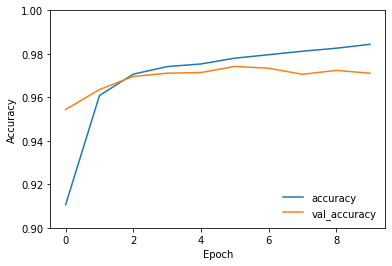

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Task 2 
In this task, multiple convolutional layers are allowed in the neural network. I decided to use 4 convolutional layers. Overall, the network structure is similar to the network with only 1 convolutional layer, but with multiple convolutional layers. 

In [9]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1)))
model1.add(keras.layers.MaxPooling2D(pool_size=2))
model1.add(keras.layers.Conv2D(8, 3, activation='relu'))
model1.add(keras.layers.Conv2D(8, 3, activation='relu'))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(10))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 648)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6490      
Total params: 7,738
Trainable params: 7,738
Non-trainable params: 0
____________________________________________________

The model `model1` is compiled and trained.

In [10]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.9491 - accuracy: 0.8739 - val_loss: 0.1684 - val_accuracy: 0.9505
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1395 - accuracy: 0.9586 - val_loss: 0.0973 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0965 - accuracy: 0.9707 - val_loss: 0.0862 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0776 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0535 - accuracy: 0.9827 - val_loss: 0.0574 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0587 -

The results show that for the multiple convolution layer network, the accuracy is 98.90% on the training dataset, and 98.34% on the testing dataset. Looking at the training data, it can be seen that after the 6th epoch, the testing accuracy starts to plateau, this suggests that even with more training, this network can only achieve a maximum testing accuracy of around 98.4%. 

(1 convolution layer network value on left, 3 convolution layer network on right)
- **Final training data set accuracy**: 98.44% vs 98.90%

- **Final testing data set accuracy**: 97.11% (Max 97.42%) vs 98.36% (Max 98.40%)

Therefore, by adding more convolution layers, it resulted in a 1.25% increase in accuracy for the testing data set, which is the accuracy that we should be more interested in. Testing data set accuracy is more important because the model is being trained on the training data set, so the model has already seen the training data set.

The training time taken for the second neural network takes around 50% longer compared to the first.

313/313 - 1s - loss: 0.0604 - accuracy: 0.9836


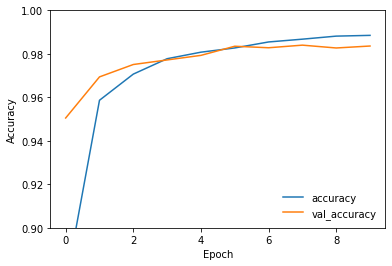

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)